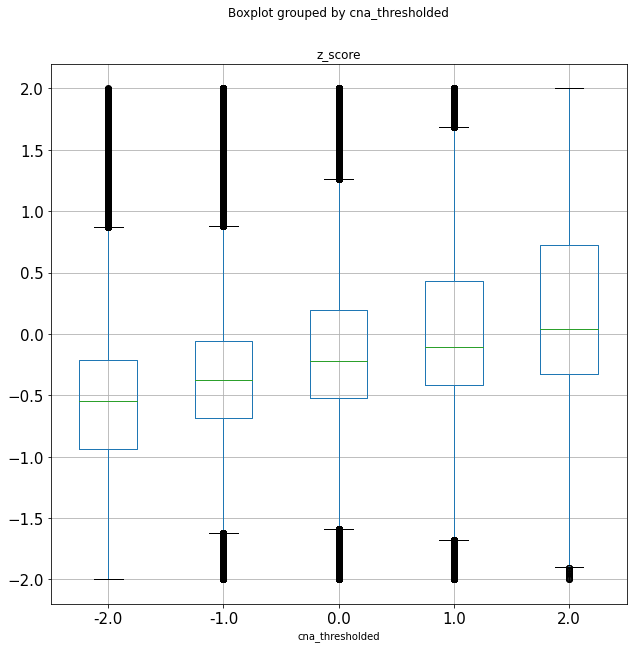

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt


processed_data_dir = "../data/processed"
cna_thresholded = pd.concat(
    [pd.read_csv(os.path.join(processed_data_dir, cancer_type, "cna_thresholded.tsv"), sep="\t") for cancer_type in ["blca", "lusc", "ov"]],
    axis=0
)

gex = pd.concat(
    [pd.read_csv(os.path.join(processed_data_dir, cancer_type, "gex.tsv"), sep="\t") for cancer_type in ["blca", "lusc", "ov"]],
    axis=0
)

intersecting_sample_ids = sorted(list(set(cna_thresholded["sample_id"].values).intersection(set(gex["sample_id"].values))))
intersecting_gene_ids = sorted(list(set(cna_thresholded.columns).intersection(set(gex.columns))))

cna_thresholded = cna_thresholded[cna_thresholded["sample_id"].isin(intersecting_sample_ids)][intersecting_gene_ids].drop(columns=["sample_id"]).values
gex = gex[gex["sample_id"].isin(intersecting_sample_ids)][intersecting_gene_ids].drop(columns=["sample_id"]).values
z_scores = (gex - gex.mean(axis=0)) / gex.std(axis=0)

cna_thresholded_1d = cna_thresholded.ravel()
z_scores_1d = z_scores.ravel()

cna_thresholded_1d_filtered = [cna_thresholded_1d_i for index, cna_thresholded_1d_i in enumerate(cna_thresholded_1d) if z_scores_1d[index] > -2 and z_scores_1d[index] < 2]
z_scores_1d_filtered = [z_scores_1d_i for index, z_scores_1d_i in enumerate(z_scores_1d) if z_scores_1d[index] > -2 and z_scores_1d[index] < 2]

df = pd.DataFrame.from_dict({"cna_thresholded": cna_thresholded_1d_filtered,
                             "z_score": z_scores_1d_filtered})

df.boxplot(column="z_score", by="cna_thresholded", figsize=(10, 10), fontsize=15)
plt.show();


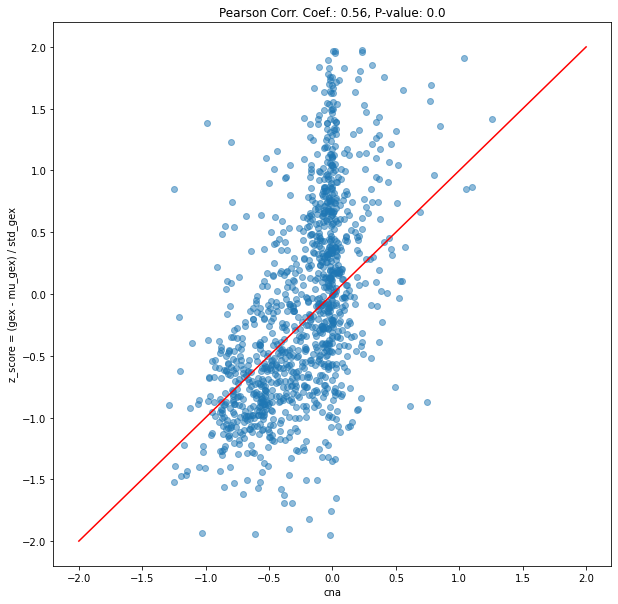

In [8]:
import os
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt


processed_data_dir = "../data/processed"

cna = pd.concat(
    [pd.read_csv(os.path.join(processed_data_dir, cancer_type, "cna.tsv"), sep="\t") for cancer_type in ["blca", "lusc", "ov"]],
    axis=0
)

gex = pd.concat(
    [pd.read_csv(os.path.join(processed_data_dir, cancer_type, "gex.tsv"), sep="\t") for cancer_type in ["blca", "lusc", "ov"]],
    axis=0
)

intersecting_sample_ids = sorted(list(set(cna["sample_id"].values).intersection(set(gex["sample_id"].values))))
gene_ids = ["6794"]

cna = cna[cna["sample_id"].isin(intersecting_sample_ids)][gene_ids].values
gex = gex[gex["sample_id"].isin(intersecting_sample_ids)][gene_ids].values
z_scores = (gex - gex.mean(axis=0)) / gex.std(axis=0)

z_scores_1d = z_scores.ravel()
cna_1d = cna.ravel()

cna_1d_filtered = [cna_i for index, cna_i in enumerate(cna_1d) if z_scores_1d[index] > -2 and z_scores_1d[index] < 2]
z_scores_1d_filtered = [z_scores_1d_i for index, z_scores_1d_i in enumerate(z_scores_1d) if z_scores_1d[index] > -2 and z_scores_1d[index] < 2]

df = pd.DataFrame.from_dict({"cna": cna_1d_filtered,
                             "z_score": z_scores_1d_filtered})

correlation, p_value = pearsonr(df["cna"].values, df["z_score"].values)

plt.figure(figsize=(10, 10))
plt.scatter(df["cna"].values, df["z_score"].values, alpha=0.5)
plt.xlabel("cna")
plt.ylabel("z_score = (gex - mu_gex) / std_gex")
plt.title(f"Pearson Corr. Coef.: {np.round(correlation, 2)}, P-value: {np.round(p_value, 2)}")
plt.plot([-2, 2], [-2, 2], color="red")
plt.show();
